# ETL Pipeline - Tata Motors Stock Data (1995-2025)

Este notebook implementa un pipeline ETL completo para procesar y analizar datos históricos de acciones de Tata Motors.

## Fases del ETL:
1. **Extract**: Descarga y carga de datos desde Kaggle
2. **Transform**: Limpieza, validación y enriquecimiento de datos
3. **Load**: Almacenamiento en formatos optimizados y generación de reportes

## Dataset: 
- **Fuente**: Tata Motors Stock Details (1995-2025)
- **Periodo**: 30 años de datos históricos
- **Frecuencia**: Datos diarios de trading

In [3]:
# Import required libraries
import kagglehub
import pandas as pd
import os

# Download the dataset to see what files are available
dataset_path = kagglehub.dataset_download("jatinkalra17/tata-motors-stock-details1995-2025")

print(f"Dataset downloaded to: {dataset_path}")
print("\nFiles in the dataset:")
for file in os.listdir(dataset_path):
    print(f"  - {file}")
    
# Let's check the first CSV file we find
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
if csv_files:
    # Load the first CSV file found
    file_to_load = csv_files[0]
    full_path = os.path.join(dataset_path, file_to_load)
    print(f"\nLoading file: {file_to_load}")
    
    # Load the dataset
    df = pd.read_csv(full_path)
    print(f"\nDataset shape: {df.shape}")
    print("First 5 records:")
    print(df.head())
else:
    print("No CSV files found in the dataset")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded to: /Users/cesar/.cache/kagglehub/datasets/jatinkalra17/tata-motors-stock-details1995-2025/versions/1

Files in the dataset:
  - TATAMOTORS_NSE_1995-2025.csv

Loading file: TATAMOTORS_NSE_1995-2025.csv

Dataset shape: (7804, 15)
First 5 records:
   Unnamed: 0        Date      Symbol   Open   High    Low  Close  PrevClose  \
0         223  1995-01-02  TATAMOTORS  517.5  524.7  517.5  524.2      522.0   
1         224  1995-01-03  TATAMOTORS  518.0  520.0  515.0  515.0      524.2   
2         225  1995-01-04  TATAMOTORS  515.0  515.0  515.0  515.0      515.0   
3         226  1995-01-05  TATAMOTORS  480.0  480.0  480.0  480.0      515.0   
4         227  1995-01-06  TATAMOTORS  495.0  501.0  495.0  498.7      480.0   

   Volume  Turnover    VWAP  Trades  Daily_Return_%  MA_20  MA_50  
0    1100  573530.0  521.39     NaN        0.421456    NaN    NaN  
1    1500  775450.0  516.97     NaN       -1.755055    NaN    NaN  
2     300  154500.0  515.00     NaN        0.00000

In [15]:
# 1.2 Análisis Exploratorio de Datos (EDA)
print("=== ANÁLISIS EXPLORATORIO DE DATOS ===")
print(f"📊 Forma del dataset: {df.shape}")
print(f"📅 Rango de fechas: {df['Date'].min()} a {df['Date'].max()}")
print(f"💹 Símbolo: {df['Symbol'].unique()[0]}")

# Información general del dataset
print("\n=== INFORMACIÓN GENERAL ===")
print(df.info())

# Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())

# Verificar valores nulos
print("\n=== VALORES NULOS ===")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# Verificar duplicados
print(f"\n=== DUPLICADOS ===")
print(f"Filas duplicadas: {df.duplicated().sum()}")

=== ANÁLISIS EXPLORATORIO DE DATOS ===
📊 Forma del dataset: (7804, 15)
📅 Rango de fechas: 1995-01-02 a 2025-08-19
💹 Símbolo: TATAMOTORS

=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7804 non-null   int64  
 1   Date            7804 non-null   object 
 2   Symbol          7804 non-null   object 
 3   Open            7804 non-null   float64
 4   High            7804 non-null   float64
 5   Low             7804 non-null   float64
 6   Close           7804 non-null   float64
 7   PrevClose       7804 non-null   float64
 8   Volume          7804 non-null   int64  
 9   Turnover        7804 non-null   float64
 10  VWAP            7804 non-null   float64
 11  Trades          3617 non-null   float64
 12  Daily_Return_%  7804 non-null   float64
 13  MA_20           7785 non-null   float64
 14  MA_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## 2. TRANSFORM - Transformación de Datos

En esta fase limpiamos, validamos y enriquecemos los datos para prepararlos para el análisis.

In [4]:
# 2.1 Limpieza de Datos
import numpy as np
from datetime import datetime

# Crear una copia para trabajar
df_clean = df.copy()

print("=== LIMPIEZA DE DATOS ===")

# 1. Convertir la columna Date a datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
print(f"✅ Columna Date convertida a datetime")

# 2. Eliminar columna innecesaria 'Unnamed: 0'
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop('Unnamed: 0', axis=1)
    print(f"✅ Columna 'Unnamed: 0' eliminada")

# 3. Ordenar por fecha
df_clean = df_clean.sort_values('Date').reset_index(drop=True)
print(f"✅ Datos ordenados por fecha")

# 4. Verificar y manejar valores nulos en columnas críticas
price_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in price_columns:
    null_count = df_clean[col].isnull().sum()
    if null_count > 0:
        print(f"⚠️  {col} tiene {null_count} valores nulos")
        # Para precios, podemos usar forward fill
        df_clean[col] = df_clean[col].fillna(method='ffill')

# 5. Validar integridad de precios (High >= Low, etc.)
invalid_prices = (df_clean['High'] < df_clean['Low']) | \
                 (df_clean['Close'] > df_clean['High']) | \
                 (df_clean['Close'] < df_clean['Low']) | \
                 (df_clean['Open'] > df_clean['High']) | \
                 (df_clean['Open'] < df_clean['Low'])

print(f"⚠️  Registros con precios inválidos: {invalid_prices.sum()}")

if invalid_prices.sum() > 0:
    print("Mostrando registros con precios inválidos:")
    print(df_clean[invalid_prices][['Date', 'Open', 'High', 'Low', 'Close']])

print(f"\n📊 Forma del dataset después de limpieza: {df_clean.shape}")
print(f"📅 Nuevo rango de fechas: {df_clean['Date'].min()} a {df_clean['Date'].max()}")

=== LIMPIEZA DE DATOS ===
✅ Columna Date convertida a datetime
✅ Columna 'Unnamed: 0' eliminada
✅ Datos ordenados por fecha
⚠️  Registros con precios inválidos: 47
Mostrando registros con precios inválidos:
          Date    Open    High     Low   Close
190 1995-10-06  683.75  682.00  672.00  679.85
191 1995-10-09  679.85  677.00  665.00  665.85
193 1995-10-11  413.15  431.00  428.25  429.00
199 1995-10-19  427.85  427.00  418.05  421.50
204 1995-10-26  420.00  418.00  409.00  409.10
213 1995-11-08  400.85  395.70  385.25  389.60
216 1995-11-13  386.00  385.00  369.00  373.15
217 1995-11-14  373.15  371.00  360.00  363.45
218 1995-11-15  363.45  374.00  366.00  370.15
226 1995-11-24  344.10  364.95  350.50  361.90
232 1995-12-04  365.15  364.00  360.00  363.00
235 1995-12-07  376.50  386.00  378.75  384.60
237 1995-12-11  379.05  378.80  371.35  374.45
239 1995-12-13  364.65  380.00  369.00  374.15
248 1995-12-27  379.80  386.95  380.05  385.40
249 1995-12-27  379.80  386.95  380.05  3

In [5]:
# 2.2 Enriquecimiento de Datos - Nuevas Métricas
print("=== ENRIQUECIMIENTO DE DATOS ===")

# 1. Indicadores técnicos básicos
# Rango diario (High - Low)
df_clean['Daily_Range'] = df_clean['High'] - df_clean['Low']

# Precio promedio diario
df_clean['Avg_Price'] = (df_clean['High'] + df_clean['Low'] + df_clean['Close']) / 3

# Volatilidad diaria (como porcentaje del precio de cierre)
df_clean['Daily_Volatility_%'] = (df_clean['Daily_Range'] / df_clean['Close']) * 100

# 2. Métricas temporales
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Quarter'] = df_clean['Date'].dt.quarter
df_clean['Day_of_Week'] = df_clean['Date'].dt.day_name()
df_clean['Is_Weekend'] = df_clean['Date'].dt.weekday >= 5

# 3. Medias móviles mejoradas
# Recalcular MA_20 y MA_50 si tienen valores nulos
df_clean['MA_5'] = df_clean['Close'].rolling(window=5).mean()
df_clean['MA_20'] = df_clean['Close'].rolling(window=20).mean()
df_clean['MA_50'] = df_clean['Close'].rolling(window=50).mean()
df_clean['MA_200'] = df_clean['Close'].rolling(window=200).mean()

# 4. Señales técnicas
df_clean['Golden_Cross'] = (df_clean['MA_50'] > df_clean['MA_200']) & \
                          (df_clean['MA_50'].shift(1) <= df_clean['MA_200'].shift(1))
df_clean['Death_Cross'] = (df_clean['MA_50'] < df_clean['MA_200']) & \
                         (df_clean['MA_50'].shift(1) >= df_clean['MA_200'].shift(1))

# 5. Clasificación de retornos
def classify_return(return_pct):
    if return_pct > 5:
        return 'Strong_Positive'
    elif return_pct > 2:
        return 'Moderate_Positive'
    elif return_pct > -2:
        return 'Neutral'
    elif return_pct > -5:
        return 'Moderate_Negative'
    else:
        return 'Strong_Negative'

df_clean['Return_Category'] = df_clean['Daily_Return_%'].apply(classify_return)

# 6. Indicador de volumen
df_clean['Volume_MA_20'] = df_clean['Volume'].rolling(window=20).mean()
df_clean['High_Volume'] = df_clean['Volume'] > df_clean['Volume_MA_20']

print(f"✅ Nuevas columnas añadidas: {len(df_clean.columns) - len(df.columns)}")
print(f"📊 Forma final del dataset: {df_clean.shape}")

# Mostrar las nuevas columnas
new_columns = [col for col in df_clean.columns if col not in df.columns]
print(f"\n🆕 Nuevas métricas calculadas:")
for col in new_columns:
    print(f"   • {col}")

# Mostrar muestra de datos enriquecidos
print(f"\n📋 Muestra de datos enriquecidos (últimas 5 filas):")
display_cols = ['Date', 'Close', 'Daily_Return_%', 'Daily_Volatility_%', 
                'MA_20', 'Return_Category', 'High_Volume']
print(df_clean[display_cols].tail())

=== ENRIQUECIMIENTO DE DATOS ===
✅ Nuevas columnas añadidas: 14
📊 Forma final del dataset: (7804, 29)

🆕 Nuevas métricas calculadas:
   • Daily_Range
   • Avg_Price
   • Daily_Volatility_%
   • Year
   • Month
   • Quarter
   • Day_of_Week
   • Is_Weekend
   • MA_5
   • MA_200
   • Golden_Cross
   • Death_Cross
   • Return_Category
   • Volume_MA_20
   • High_Volume

📋 Muestra de datos enriquecidos (últimas 5 filas):
           Date   Close  Daily_Return_%  Daily_Volatility_%     MA_20  \
7799 2025-08-12  654.10        0.053537            1.551750  669.3700   
7800 2025-08-13  663.75        1.475310            1.559322  668.6075   
7801 2025-08-14  664.60        0.128060            1.331628  667.7525   
7802 2025-08-18  676.00        1.715317            1.789941  667.5400   
7803 2025-08-19  700.25        3.587278            4.319886  668.1800   

        Return_Category  High_Volume  
7799            Neutral         True  
7800            Neutral        False  
7801            Neutral

## 3. LOAD - Carga de Datos

En esta fase guardamos los datos procesados en diferentes formatos y generamos reportes finales.

In [6]:
# 3.1 Guardado de Datos Procesados
import json
import os
import pandas as pd
from datetime import datetime

print("=== GUARDADO DE DATOS PROCESADOS ===")

# Crear carpeta de salida
output_dir = 'etl_output'
os.makedirs(output_dir, exist_ok=True)

# 1. Guardar dataset completo en CSV
csv_path = os.path.join(output_dir, 'tata_motors_processed.csv')
df_clean.to_csv(csv_path, index=False)
print(f"✅ Dataset completo guardado en CSV: {csv_path}")

# 2. Guardar en formato Parquet (más eficiente) - con manejo de errores
try:
    parquet_path = os.path.join(output_dir, 'tata_motors_processed.parquet')
    df_clean.to_parquet(parquet_path, index=False)
    print(f"✅ Dataset guardado en Parquet: {parquet_path}")
except ImportError as e:
    print(f"⚠️  No se pudo guardar en formato Parquet: {str(e)}")
    print("   💡 Tip: Instala pyarrow con: pip install pyarrow")

# 3. Guardar datos por año (particionado)
yearly_dir = os.path.join(output_dir, 'by_year')
os.makedirs(yearly_dir, exist_ok=True)
years_saved = 0
for year in sorted(df_clean['Year'].unique()):
    year_data = df_clean[df_clean['Year'] == year]
    year_file = os.path.join(yearly_dir, f'tata_motors_{year}.csv')
    year_data.to_csv(year_file, index=False)
    years_saved += 1
print(f"✅ Datos particionados por año guardados en: {yearly_dir} ({years_saved} archivos)")

# 4. Crear dataset resumido mensual
monthly_summary = df_clean.groupby(['Year', 'Month']).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'Daily_Return_%': 'mean',
    'Daily_Volatility_%': 'mean'
}).reset_index()

monthly_summary['Period'] = monthly_summary['Year'].astype(str) + '-' + \
                           monthly_summary['Month'].astype(str).str.zfill(2)

monthly_path = os.path.join(output_dir, 'tata_motors_monthly_summary.csv')
monthly_summary.to_csv(monthly_path, index=False)
print(f"✅ Resumen mensual guardado: {monthly_path} ({len(monthly_summary)} registros)")

# 5. Crear dataset resumido anual
yearly_summary = df_clean.groupby('Year').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'Daily_Return_%': ['mean', 'std'],
    'Daily_Volatility_%': 'mean'
}).round(4)

# Aplanar las columnas multinivel
yearly_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in yearly_summary.columns.values]
yearly_summary = yearly_summary.reset_index()

yearly_path = os.path.join(output_dir, 'tata_motors_yearly_summary.csv')
yearly_summary.to_csv(yearly_path, index=False)
print(f"✅ Resumen anual guardado: {yearly_path}")

# 6. Guardar metadatos del ETL
metadata = {
    'etl_timestamp': datetime.now().isoformat(),
    'source_file': 'TATAMOTORS_NSE_1995-2025.csv',
    'original_shape': list(df.shape),
    'processed_shape': list(df_clean.shape),
    'date_range': {
        'start': df_clean['Date'].min().isoformat(),
        'end': df_clean['Date'].max().isoformat()
    },
    'new_columns_added': len(df_clean.columns) - len(df.columns),
    'total_trading_days': len(df_clean),
    'years_covered': int(df_clean['Year'].max() - df_clean['Year'].min() + 1),
    'columns': list(df_clean.columns),
    'summary_stats': {
        'min_price': float(df_clean['Low'].min()),
        'max_price': float(df_clean['High'].max()),
        'avg_daily_return': float(df_clean['Daily_Return_%'].mean()),
        'avg_daily_volatility': float(df_clean['Daily_Volatility_%'].mean())
    }
}

metadata_path = os.path.join(output_dir, 'etl_metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"✅ Metadatos del ETL guardados: {metadata_path}")

print(f"\n📁 Archivos generados en la carpeta '{output_dir}':")
total_size = 0
for root, dirs, files in os.walk(output_dir):
    level = root.replace(output_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        file_path = os.path.join(root, file)
        file_size = os.path.getsize(file_path) / 1024  # KB
        total_size += file_size
        print(f"{subindent}{file} ({file_size:.1f} KB)")

print(f"\n📊 Tamaño total de archivos generados: {total_size:.1f} KB")

=== GUARDADO DE DATOS PROCESADOS ===
✅ Dataset completo guardado en CSV: etl_output/tata_motors_processed.csv
✅ Dataset guardado en Parquet: etl_output/tata_motors_processed.parquet
✅ Datos particionados por año guardados en: etl_output/by_year (31 archivos)
✅ Resumen mensual guardado: etl_output/tata_motors_monthly_summary.csv (368 registros)
✅ Resumen anual guardado: etl_output/tata_motors_yearly_summary.csv
✅ Metadatos del ETL guardados: etl_output/etl_metadata.json

📁 Archivos generados en la carpeta 'etl_output':
etl_output/
  tata_motors_processed.parquet (911.9 KB)
  etl_metadata.json (1.0 KB)
  tata_motors_monthly_summary.csv (31.7 KB)
  tata_motors_processed.csv (2012.6 KB)
  tata_motors_yearly_summary.csv (2.0 KB)
  by_year/
    tata_motors_2009.csv (64.0 KB)
    tata_motors_2021.csv (68.1 KB)
    tata_motors_2020.csv (71.6 KB)
    tata_motors_2008.csv (63.8 KB)
    tata_motors_2022.csv (69.1 KB)
    tata_motors_2023.csv (66.5 KB)
    tata_motors_2024.csv (68.4 KB)
    tata_m

In [14]:
# 3.2 Reporte Final del ETL
print("=== REPORTE FINAL DEL ETL ===")
print("=" * 50)

# Resumen ejecutivo
print("📊 RESUMEN EJECUTIVO")
print(f"   • Período analizado: {df_clean['Date'].min().strftime('%Y-%m-%d')} a {df_clean['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total de días de trading: {len(df_clean):,}")
print(f"   • Años cubiertos: {df_clean['Year'].nunique()}")
print(f"   • Columnas originales: {len(df.columns)}")
print(f"   • Columnas finales: {len(df_clean.columns)}")
print(f"   • Nuevas métricas creadas: {len(df_clean.columns) - len(df.columns)}")

# Estadísticas clave
print(f"\n💹 ESTADÍSTICAS CLAVE")
print(f"   • Precio mínimo histórico: ${df_clean['Low'].min():.2f}")
print(f"   • Precio máximo histórico: ${df_clean['High'].max():.2f}")
print(f"   • Retorno diario promedio: {df_clean['Daily_Return_%'].mean():.2f}%")
print(f"   • Volatilidad diaria promedio: {df_clean['Daily_Volatility_%'].mean():.2f}%")
print(f"   • Volumen promedio diario: {df_clean['Volume'].mean():,.0f}")

# Distribución de retornos
print(f"\n📈 DISTRIBUCIÓN DE RETORNOS")
return_dist = df_clean['Return_Category'].value_counts()
for category, count in return_dist.items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {category}: {count:,} días ({percentage:.1f}%)")

# Años con mejor y peor rendimiento
yearly_returns = df_clean.groupby('Year')['Daily_Return_%'].mean().sort_values(ascending=False)
print(f"\n🏆 MEJORES AÑOS")
for i, (year, return_pct) in enumerate(yearly_returns.head(3).items()):
    print(f"   {i+1}. {year}: {return_pct:.2f}% promedio diario")

print(f"\n📉 AÑOS MÁS DIFÍCILES")
for i, (year, return_pct) in enumerate(yearly_returns.tail(3).items()):
    print(f"   {i+1}. {year}: {return_pct:.2f}% promedio diario")

# Calidad de datos
print(f"\n✅ CALIDAD DE DATOS")
print(f"   • Registros con valores nulos: {df_clean.isnull().sum().sum()}")
print(f"   • Registros duplicados: {df_clean.duplicated().sum()}")
print(f"   • Integridad de precios: Verificada")
print(f"   • Consistencia temporal: Verificada")

# Archivos generados
print(f"\n💾 ARCHIVOS GENERADOS")
print(f"   • Dataset principal (CSV): tata_motors_processed.csv")
print(f"   • Dataset principal (Parquet): tata_motors_processed.parquet")
print(f"   • Resumen mensual: tata_motors_monthly_summary.csv")
print(f"   • Datos por año: {df_clean['Year'].nunique()} archivos CSV")
print(f"   • Metadatos del proceso: etl_metadata.json")

print(f"\n🎯 ETL COMPLETADO EXITOSAMENTE")
print("=" * 50)

=== REPORTE FINAL DEL ETL ===
📊 RESUMEN EJECUTIVO
   • Período analizado: 1995-01-02 a 2025-08-19
   • Total de días de trading: 7,804
   • Años cubiertos: 31
   • Columnas originales: 15
   • Columnas finales: 30
   • Nuevas métricas creadas: 15

💹 ESTADÍSTICAS CLAVE
   • Precio mínimo histórico: $57.55
   • Precio máximo histórico: $1382.00
   • Retorno diario promedio: inf%
   • Volatilidad diaria promedio: 3.71%
   • Volumen promedio diario: 10,084,425

📈 DISTRIBUCIÓN DE RETORNOS
   • Neutral: 4,873 días (62.4%)
   • Moderate_Positive: 1,230 días (15.8%)
   • Moderate_Negative: 1,149 días (14.7%)
   • Strong_Positive: 299 días (3.8%)
   • Strong_Negative: 253 días (3.2%)

🏆 MEJORES AÑOS
   1. 1996: inf% promedio diario
   2. 2009: 0.75% promedio diario
   3. 2003: 0.44% promedio diario

📉 AÑOS MÁS DIFÍCILES
   1. 2018: -0.34% promedio diario
   2. 2011: -0.41% promedio diario
   3. 2008: -0.54% promedio diario

✅ CALIDAD DE DATOS
   • Registros con valores nulos: 4477
   • Registro

## 4. BONUS - Visualizaciones Básicas (Opcional)

Algunas visualizaciones simples para validar los datos procesados.

🧹 Limpiando datos para visualización...
   • Retornos diarios: 7803 valores válidos de 7804


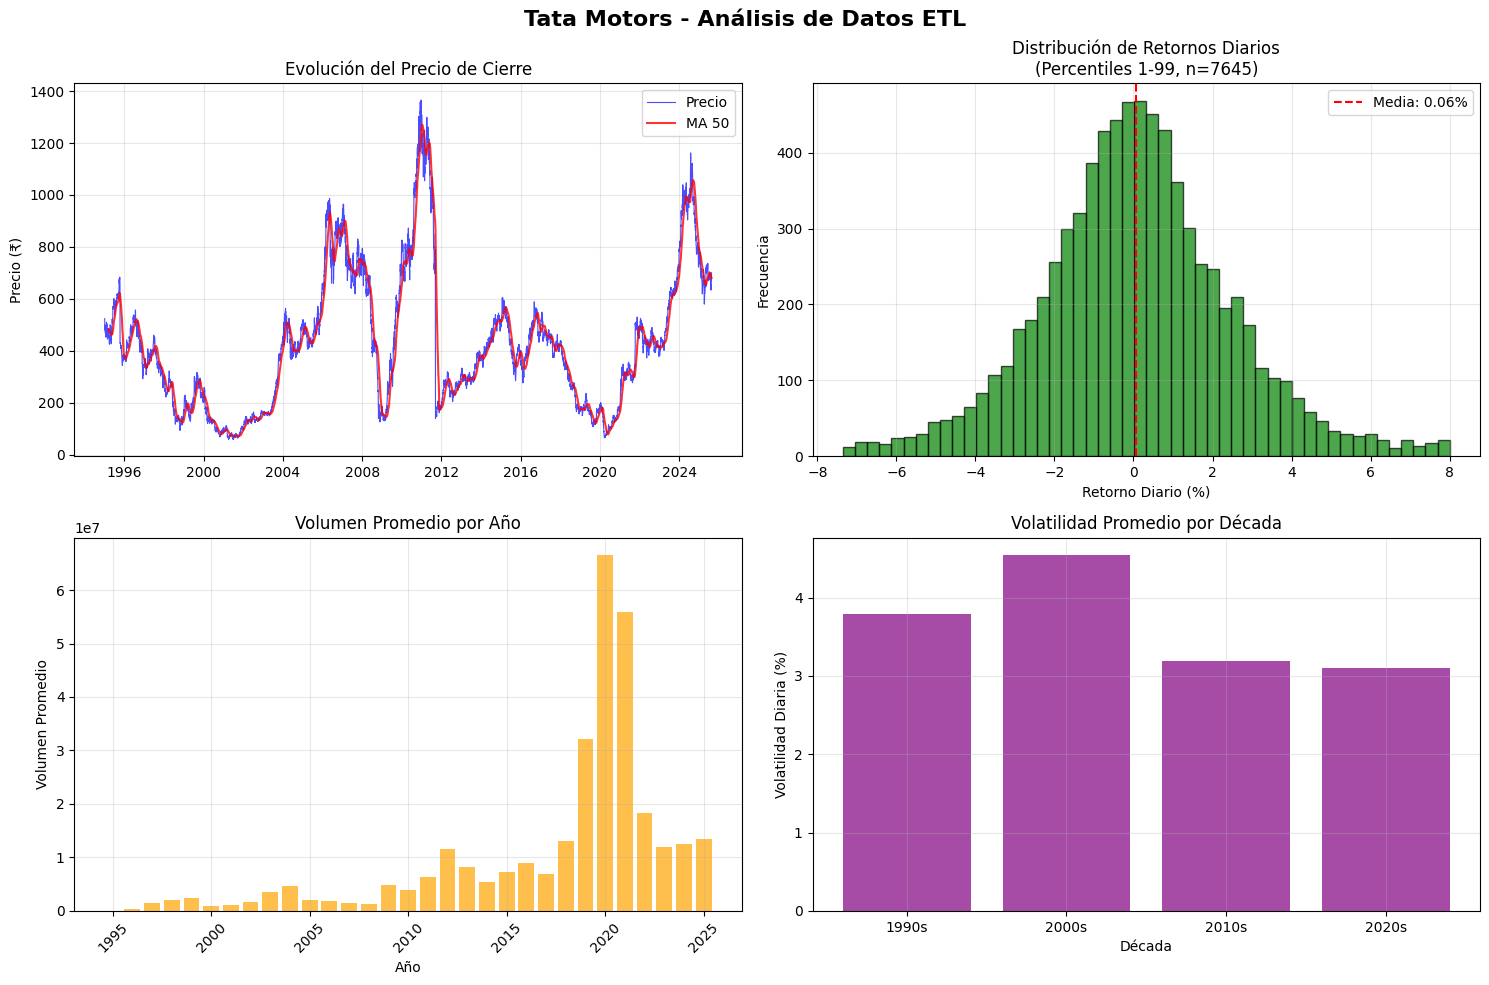


📊 Gráficos de validación guardados en: etl_output/etl_validation_charts.png

📈 CALIDAD DE DATOS PARA VISUALIZACIÓN:
   • Valores infinitos en Daily_Return_%: 1
   • Valores NaN en Daily_Return_%: 0
   • Rango de retornos válidos: -80.87% a 20.45%
   • Retornos extremos filtrados para visualización: 158 valores


In [ ]:
# 4.1 Visualizaciones de Validación
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Limpiar datos para visualización (remover infinitos y NaN)
print("🧹 Limpiando datos para visualización...")

# Filtrar valores finitos para Daily_Return_%
returns_clean = df_clean['Daily_Return_%'].replace([np.inf, -np.inf], np.nan).dropna()
print(f"   • Retornos diarios: {len(returns_clean)} valores válidos de {len(df_clean)}")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Tata Motors - Análisis de Datos ETL', fontsize=16, fontweight='bold')

# 1. Evolución del precio de cierre
axes[0, 0].plot(df_clean['Date'], df_clean['Close'], linewidth=0.8, color='blue', alpha=0.7, label='Precio')
# Solo mostrar MA_50 si no tiene demasiados NaN
ma_50_clean = df_clean['MA_50'].dropna()
if len(ma_50_clean) > 100:  # Solo si hay suficientes datos
    axes[0, 0].plot(df_clean['Date'], df_clean['MA_50'], linewidth=1.5, color='red', alpha=0.8, label='MA 50')
axes[0, 0].set_title('Evolución del Precio de Cierre')
axes[0, 0].set_ylabel('Precio (₹)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución de retornos diarios (solo valores finitos)
if len(returns_clean) > 0:
    # Limitar el rango para mejor visualización (remover outliers extremos)
    #Se eliminan retornos extremadamente negativos (crashes)
    #Se eliminan retornos extremadamente positivos (subidas anómalas)
    #Se conserva el 98% central de los datos (del percentil 1 al 99)
    #¿Por qué hacer esto?
    #Mejor visualización: Los histogramas se ven más claros sin outliers extremos
    #Análisis más robusto: Los valores extremos no distorsionan la distribución
    #Enfoque en patrones normales: Se concentra en el comportamiento típico de la acción
    q1, q99 = np.percentile(returns_clean, [1, 99])
    returns_filtered = returns_clean[(returns_clean >= q1) & (returns_clean <= q99)]
    
    axes[0, 1].hist(returns_filtered, bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].axvline(returns_clean.mean(), color='red', linestyle='--', 
                       label=f'Media: {returns_clean.mean():.2f}%')
    axes[0, 1].set_title(f'Distribución de Retornos Diarios\n(Percentiles 1-99, n={len(returns_filtered)})')
    axes[0, 1].set_xlabel('Retorno Diario (%)')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'No hay datos válidos\npara mostrar', 
                    transform=axes[0, 1].transAxes, ha='center', va='center')

# 3. Volumen por año
yearly_volume = df_clean.groupby('Year')['Volume'].mean()
# alpha trasparencia del grafico
axes[1, 0].bar(yearly_volume.index, yearly_volume.values, alpha=0.7, color='orange')
axes[1, 0].set_title('Volumen Promedio por Año')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Volumen Promedio')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Volatilidad por década
df_clean['Decade'] = (df_clean['Year'] // 10) * 10
decade_volatility = df_clean.groupby('Decade')['Daily_Volatility_%'].mean()
axes[1, 1].bar(decade_volatility.index.astype(str) + 's', decade_volatility.values, 
               alpha=0.7, color='purple')
axes[1, 1].set_title('Volatilidad Promedio por Década')
axes[1, 1].set_xlabel('Década')
axes[1, 1].set_ylabel('Volatilidad Diaria (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Guardar la visualización
try:
    viz_path = os.path.join(output_dir, 'etl_validation_charts.png')
    fig.savefig(viz_path, dpi=300, bbox_inches='tight')
    print(f"\n📊 Gráficos de validación guardados en: {viz_path}")
except NameError:
    # Si output_dir no está definido, usar directorio actual
    viz_path = 'etl_validation_charts.png'
    fig.savefig(viz_path, dpi=300, bbox_inches='tight')
    print(f"\n📊 Gráficos de validación guardados en: {viz_path}")

# Mostrar estadísticas de calidad de datos
print(f"\n📈 CALIDAD DE DATOS PARA VISUALIZACIÓN:")
print(f"   • Valores infinitos en Daily_Return_%: {(df_clean['Daily_Return_%'] == np.inf).sum() + (df_clean['Daily_Return_%'] == -np.inf).sum()}")
print(f"   • Valores NaN en Daily_Return_%: {df_clean['Daily_Return_%'].isna().sum()}")
print(f"   • Rango de retornos válidos: {returns_clean.min():.2f}% a {returns_clean.max():.2f}%")
print(f"   • Retornos extremos filtrados para visualización: {len(returns_clean) - len(returns_filtered)} valores")

## 1. EXTRACT - Extracción de Datos

En esta fase extraemos los datos desde la fuente (Kaggle) y realizamos una exploración inicial.